In [1]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chisquare
from scipy.stats import shapiro, normaltest, norm
from sklearn.preprocessing import LabelEncoder
import matplotlib.ticker as ticker
df = pd.read_csv('./data/data.csv')
df.dropna(inplace=True)
df['Main Genre'] = df['Genres'].str.split(',').str[0].str.strip()
prog =0

In [2]:
#Wyświetla x najstarszych i najnowszych filmów wraz z ocenami
x = 10

oldest_movies = df.sort_values(by=['Year'], ascending=True, ignore_index=True)
print(f'{x} najstarszych -średnia ocena {oldest_movies['Your Rating'].head(x).mean()} \n'+str(oldest_movies[['Title','Year','Your Rating']].head(10))+'\n')

latest_movies = df.sort_values(by=['Year'], ascending=False, ignore_index=True)
print(f'{x} najnowszych -średnia ocena {latest_movies['Your Rating'].head(x).mean()}\n'+str(latest_movies[['Title','Year','Your Rating']].head(10)))

10 najstarszych -średnia ocena 7.3 
                       Title  Year  Your Rating
0               Piętro wyżej  1937            8
1        Czarnoksiężnik z Oz  1939            9
2          Podnieść kotwicę!  1945            6
3              Na przepustce  1949            7
4        Amerykanin w Paryżu  1951            7
5  Francis Goes to the Races  1951            6
6         Deszczowa piosenka  1952           10
7              Call Me Madam  1953            7
8         12 gniewnych ludzi  1957            8
9                     Pociąg  1959            5

10 najnowszych -średnia ocena 5.9
                        Title  Year  Your Rating
0                    Oddaj ją  2025            8
1  Jurassic World: Odrodzenie  2025            4
2             Minecraft: Film  2025            4
3                  Grzesznicy  2025            4
4         Joker: Folie à deux  2024            6
5                  Substancja  2024            8
6                        Flow  2024            8
7        

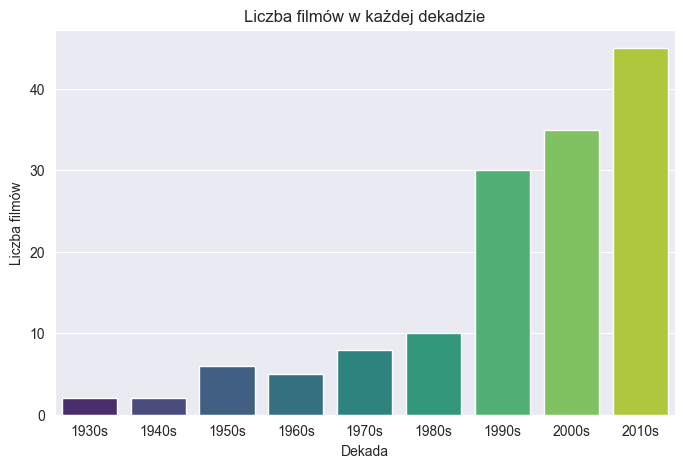

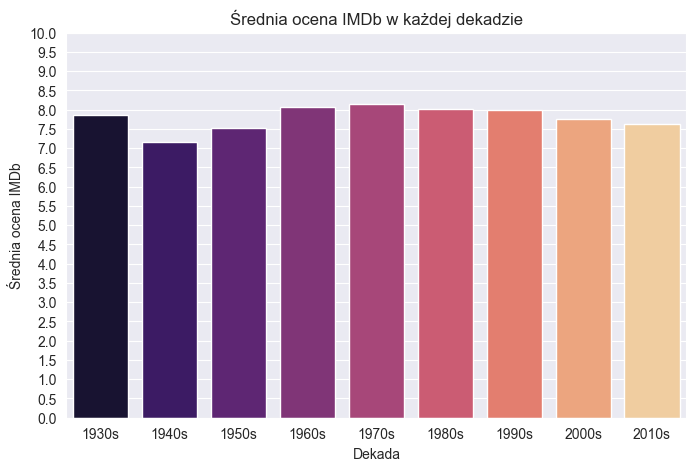

In [3]:
#Wyświetla ile filmów obejrzałem w danej dekadzie i średnie oceny w dekadzie
bins = range(df['Year'].min()//10*10, df['Year'].max()//10*10 + 10, 10)
labels = [f"{b}s" for b in bins[:-1]]
df['Decade'] = pd.cut(df['Year'], bins=bins, labels=labels, right=False)

grouped = df.groupby('Decade',observed=False).agg(
    Movie_Count=('Title', 'count'),
    Avg_IMDb_Rating=('IMDb Rating', 'mean')
).reset_index()


plt.figure(figsize=(8,5))
sns.barplot(data=grouped, x='Decade', y='Movie_Count', palette='viridis', hue='Decade')
plt.title('Liczba filmów w każdej dekadzie')
plt.ylabel('Liczba filmów')
plt.xlabel('Dekada')

plt.show()

plt.figure(figsize=(8,5))
sns.barplot(data=grouped, x='Decade', y='Avg_IMDb_Rating', palette='magma',hue='Decade')
plt.title('Średnia ocena IMDb w każdej dekadzie')
plt.ylabel('Średnia ocena IMDb')
plt.xlabel('Dekada')
plt.ylim(0, 10)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.5))
plt.show()